# Hackathon: The AED Challenge

Our Hackathon project focus on Annotation Error Detection (AED) for machine learning datasets. The goal is to identify and correct errors in the annotations of datasets used for training machine learning models.



## 🎯 Goals

Your goal is to build an automated method to detect incorrectly labeled images in a **training dataset**. You will be evaluated on how many label errors you can correctly identify.



## 📁 Datasets

You will be provided with two main datasets:

1.  **Training Set (`training_set`)**
    *   **Contents**: A collection of images and their corresponding labels.
    *   **The Catch**: This set contains an unknown number of labeling errors. You **do not** have the ground truth for which labels are incorrect.
    *   **Your Goal**: This is the dataset you must analyze. Your final submission will be a list of suspected errors from this set.

2.  **Validation Set (`validation_set`)**
    *   **Contents**: A smaller collection of images, their labels, and a special ground truth column (`is_noisy`).
    *   **Purpose**: This set is your sandbox. You can use it to develop, test, and validate your error detection models and algorithms. The `is_noisy` column will tell you exactly which labels are wrong (`1`) and which are correct (`0`), allowing you to measure your method's performance before applying it to the real challenge.

The original dataset comes from [this hackathon](https://https-deeplearning-ai.github.io/data-centric-comp/) by Andrew Ng and the Deeplearning.ai team.


## 📝 Your Task

1.  **Explore the Data**: Start by analyzing both the `training_set` and `validation_set`. Understand the classes, image characteristics, and potential sources of error.
2.  **Develop Your Method**: Use the `validation_set` to build and refine your strategy. You could train a model and look for low-confidence predictions, analyze feature embeddings to find outliers, or use other clever techniques.
3.  **Identify Errors in the Training Set**: Once you are confident in your method, apply it to the `training_set` to predict which items have incorrect labels.
4.  **Generate a Submission File**: Create a CSV file detailing your findings.



## 🚀 Submission

Your final output must be a single CSV file named `submission.csv`. This file will be uploaded to the online judging platform.

For your grades,  you'll also need to upload your work to a GitHub repository. The repository should include:
-   Your code for the error detection method.
-   A README file explaining your approach, how to run your code, and any dependencies.
-   Any additional files or scripts that are necessary to reproduce your results.

## 📅 Timeline
-   **Start Time**: 2025-06-26 - 19:00
-   **End Time**: 2025-06-26 - 21:30
-   **Submission Deadline**: 2025-06-26 - 21:30
-   **SIGAA Submission Deadline**: 2025-06-27 - 23:59



### Submission File Format

The CSV file must contain exactly two columns: `uid` and `is_noisy`.

*   `uid`: The identifier/filename of the image from the `training_set`.
*   `is_noisy`: Your prediction. Use `1` if you believe the label is an error, and `0` if you believe it is correct.

**Example `submission.csv`:**

```csv
uid,is_noisy
12345676890aed,0
12345676890aee,1
12345676890aef,0
12345676890af0,1
...
```



## 🏆 Evaluation

Your submission will be evaluated using the **Matthews Correlation Coefficient (MCC)**.

*   **Why MCC?**: MCC is a robust metric for binary classification that performs well even when the classes are highly imbalanced (as we expect far more correct labels than incorrect ones). It provides a single, balanced score that accounts for true/false positives and negatives.
*   **The Winner**: The team with the highest MCC score on the hidden ground truth of the `training_set` wins!
*   **Your Grade**: Your grade will be based on the quality of your submission on SIGAA.

The final **leaderboard** on the platform will show your rank and score after each submission.


In [1]:
import pandas as pd
import requests
import io
# Download the dataset from the provided URL
url_train = 'https://public.jacob.al/imd3011-datacentric_ai/hackathon-2025-2/train_no_labels.json.gz'
url_valid = 'https://public.jacob.al/imd3011-datacentric_ai/hackathon-2025-2/valid.json.gz'

response_train = requests.get(url_train)
response_valid = requests.get(url_valid)

# Read the JSON data into pandas DataFrames
train_data = pd.read_json(io.BytesIO(response_train.content), compression='gzip')
valid_data = pd.read_json(io.BytesIO(response_valid.content), compression='gzip')


In [2]:
train_data

,image,label,uid
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",I,32e9d51d-8a22-4f97-9955-8f9647a7f13c
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",VII,a7c9faf9-a7e2-4687-a57b-ac0558ccee8b
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",II,0baccef4-de79-4f71-b7ec-c77cc2ab9e50
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",IX,81fe9a13-d0fe-43ad-8185-c59ea6117cce
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",II,92e3b890-c9ab-4e9c-a63b-ad42de92e5a2
...,...,...,...
2401,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",IX,f585b600-175d-4709-a00a-5e608be22d93
2402,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",I,caa40a00-e396-4d0b-9893-4b51a7a8d205
2403,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",V,f690990e-1d3a-48e7-92de-6bb7769e1f9a
2404,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",VIII,2f06f8a6-64d1-411f-8482-b69e61c94c82


In [3]:
valid_data

,image,label,is_noisy,uid
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",II,0,d58ccd8d-65b1-4f7d-914b-50ce98c1bbeb
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",V,0,ecccff0d-f2c1-479d-9703-ce18b1635ceb
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",III,0,e04c4f02-0a19-4020-a028-e2ed56d2f081
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",X,0,c0d36cb6-9914-44d4-b7d6-2460cbb599fb
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",I,0,5dfbdf79-2474-44fb-8942-096a3731b4be
...,...,...,...,...
420,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",VIII,1,2e631889-a3b1-44bb-bed5-de33897f129d
421,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",III,1,6c97f1f5-de71-4773-ab03-b5e36239cd90
422,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",VII,0,22c6e775-4729-4eb9-bfea-376031e07611
423,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",II,0,b636e6dd-a697-471c-b4f1-77a9006fade8


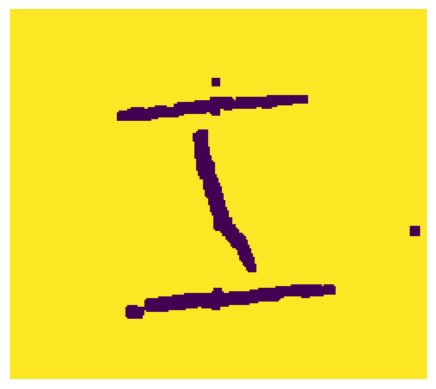

In [4]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

def show_image_from_np_array(np_array):
    np_array = np.array(np_array, dtype=np.uint8)  # Ensure the array is in the correct format
    image = Image.fromarray(np_array)
    plt.imshow(image)
    plt.axis('off')  # Hide the axis
    plt.show()

# Display the first image from the training dataset
show_image_from_np_array(train_data['image'][0])

In [5]:
valid_data.query('is_noisy == True').head(5)

,image,label,is_noisy,uid
8,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",VIII,1,c0b72cc4-6c08-4814-b577-212bea7f763b
22,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",III,1,b913a1f0-f93b-406f-a662-02cee36aab76
28,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",VII,1,89767360-1f14-4cf0-b600-4177cc9c05dd
29,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",II,1,419a9f54-7505-4733-b8de-da40a63dda9c
34,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",V,1,1429c7a4-9b9b-40bc-b2f7-9642df383894


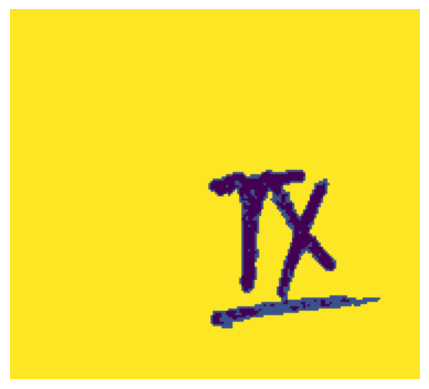

IV


In [6]:
row = valid_data.query('is_noisy == True').sample(1).iloc[0]

show_image_from_np_array(row['image'])
print(row['label'])


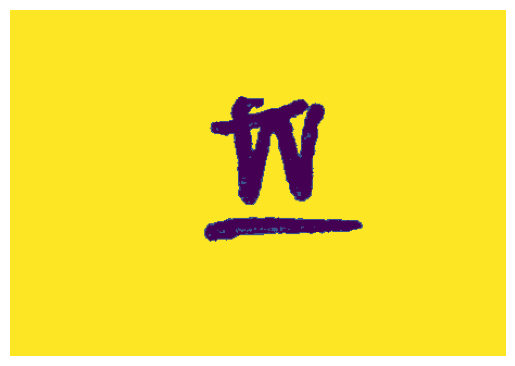

IV


In [7]:
row = valid_data.query('is_noisy == True').sample(1).iloc[0]

show_image_from_np_array(row['image'])
print(row['label'])


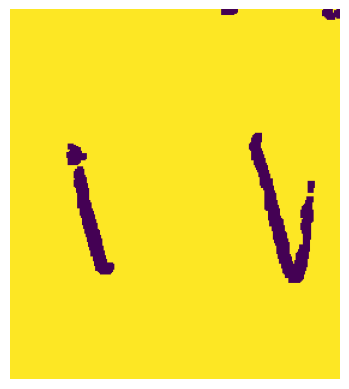

VI


In [8]:
row = valid_data.query('is_noisy == True').sample(1).iloc[0]

show_image_from_np_array(row['image'])
print(row['label'])


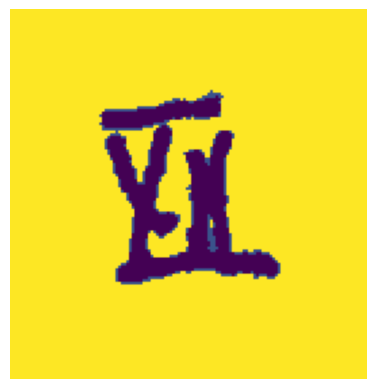

VII


In [9]:
row = valid_data.query('is_noisy == True').sample(1).iloc[0]

show_image_from_np_array(row['image'])
print(row['label'])


## ⌛ Strategy

In [10]:
!pip install cleanlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.8/349.8 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 67.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from skimage.transform import resize

TARGET_SHAPE = (128, 128)

# Resize image
def resize_image(img_2d):
    return resize(np.array(img_2d), TARGET_SHAPE, anti_aliasing=True)

# Flatten image
def flatten_image(img_2d):
    return img_2d.flatten()

valid_data["resized_image"] = valid_data["image"].apply(resize_image)
valid_data["flat_image"] = valid_data["resized_image"].apply(flatten_image)

le = LabelEncoder()
valid_data["label_encoded"] = le.fit_transform(valid_data["label"])

X = np.vstack(valid_data["flat_image"].values)
y = valid_data["label_encoded"].values

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=500, random_state=1337)
clf.fit(X, y)

RandomForestClassifier(n_estimators=500, random_state=1337)

In [12]:
from sklearn.metrics import make_scorer, matthews_corrcoef

# Define MCC scorer
mcc_scorer = make_scorer(matthews_corrcoef)

# Calculate cross-validated accuracy scores
accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

# Calculate cross-validated MCC scores
mcc_scores = cross_val_score(clf, X, y, cv=5, scoring=mcc_scorer)

print(f"Cross-validated Accuracy Scores: {accuracy_scores}")
print(f"Mean Cross-validated Accuracy: {accuracy_scores.mean()}")

print(f"Cross-validated MCC Scores: {mcc_scores}")
print(f"Mean Cross-validated MCC: {mcc_scores.mean()}")

Cross-validated Accuracy Scores: [0.24705882 0.30588235 0.24705882 0.25882353 0.25882353]
Mean Cross-validated Accuracy: 0.2635294117647059
Cross-validated MCC Scores: [0.15522645 0.21870188 0.15661606 0.1673781  0.17119948]
Mean Cross-validated MCC: 0.173824394471266


In [13]:
import cleanlab
from cleanlab.classification import CleanLearning
from cleanlab.filter import find_label_issues

# Wrap your classifier
clean_learning = CleanLearning(clf, seed=42)
cleanlab_results = clean_learning.find_label_issues(X=X, labels=y)

# See suspected label issues
suspect_indices = cleanlab_results['is_label_issue']
df_suspects = valid_data[suspect_indices]

In [79]:
suspect_indices.value_counts()

,count
is_label_issue,
False,237
True,188


In [80]:
df_suspects.is_noisy.value_counts()

,count
is_noisy,
0,152
1,36


In [81]:
valid_data.is_noisy.value_counts()

,count
is_noisy,
0,369
1,56


In [44]:
train_data["resized_image"] = train_data["image"].apply(resize_image)
train_data["flat_image"] = train_data["resized_image"].apply(flatten_image)

le = LabelEncoder()
train_data["label_encoded"] = le.fit_transform(train_data["label"])

X = np.vstack(train_data["flat_image"].values)
y = train_data["label_encoded"].values

clf = RandomForestClassifier(n_estimators=500, random_state=1337)

# Wrap your classifier
clean_learning = CleanLearning(clf, seed=42)
cleanlab_results = clean_learning.find_label_issues(X=X, labels=y)

# See suspected label issues
suspect_indices = cleanlab_results['is_label_issue']
df_suspects = train_data[suspect_indices]

In [45]:
suspect_indices.value_counts()

,count
is_label_issue,
False,1591
True,815


In [48]:
df_suspects

,image,label,uid,resized_image,flat_image,label_encoded
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",VII,a7c9faf9-a7e2-4687-a57b-ac0558ccee8b,"[[2.7647155398380363e-17, 2.7647155398380363e-...","[2.7647155398380363e-17, 2.7647155398380363e-1...",7
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",II,92e3b890-c9ab-4e9c-a63b-ad42de92e5a2,"[[2.764715539838036e-17, 2.7647155398380357e-1...","[2.764715539838036e-17, 2.7647155398380357e-17...",1
5,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",VIII,47d08f6c-297d-4173-ad0a-9bf7e024101e,"[[2.7647155398380363e-17, 2.7647155398380363e-...","[2.7647155398380363e-17, 2.7647155398380363e-1...",8
12,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",II,453b2b12-c1f1-461d-ab9a-366dafc8d745,"[[2.7647155398380363e-17, 2.7647155398380363e-...","[2.7647155398380363e-17, 2.7647155398380363e-1...",1
15,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",V,f2297751-636e-41a5-9561-8f66df34ea23,"[[2.7647155398380363e-17, 2.7647155398380363e-...","[2.7647155398380363e-17, 2.7647155398380363e-1...",5
...,...,...,...,...,...,...
2398,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",II,c258063b-c350-492c-8e39-a5695cec3df0,"[[2.7647155398380363e-17, 2.7647155398380363e-...","[2.7647155398380363e-17, 2.7647155398380363e-1...",1
2399,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",X,f0127db9-809b-40ff-a265-d53e35fbc3f1,"[[2.7647155398380363e-17, 2.7647155398380363e-...","[2.7647155398380363e-17, 2.7647155398380363e-1...",9
2403,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",V,f690990e-1d3a-48e7-92de-6bb7769e1f9a,"[[2.7647155398380357e-17, 2.7647155398380357e-...","[2.7647155398380357e-17, 2.7647155398380357e-1...",5
2404,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",VIII,2f06f8a6-64d1-411f-8482-b69e61c94c82,"[[2.7647155398380357e-17, 2.7647155398380357e-...","[2.7647155398380357e-17, 2.7647155398380357e-1...",8


In [49]:
submission_df = pd.DataFrame({'uid': train_data['uid']})
submission_df

,uid
0,32e9d51d-8a22-4f97-9955-8f9647a7f13c
1,a7c9faf9-a7e2-4687-a57b-ac0558ccee8b
2,0baccef4-de79-4f71-b7ec-c77cc2ab9e50
3,81fe9a13-d0fe-43ad-8185-c59ea6117cce
4,92e3b890-c9ab-4e9c-a63b-ad42de92e5a2
...,...
2401,f585b600-175d-4709-a00a-5e608be22d93
2402,caa40a00-e396-4d0b-9893-4b51a7a8d205
2403,f690990e-1d3a-48e7-92de-6bb7769e1f9a
2404,2f06f8a6-64d1-411f-8482-b69e61c94c82


In [50]:
issues = df_suspects.uid.values.tolist()
submission_df['is_noisy'] = submission_df['uid'].isin(issues).astype(int)
submission_df['is_noisy'].value_counts()

,count
is_noisy,
0,1591
1,815


## 🚀 Submission

Your final output must be a single CSV file named `submission.csv`. This file will be uploaded to the online judging platform.


In [51]:
final_submission = submission_df

In [52]:
final_submission.head(2) # Replace with your final submission file path


,uid,is_noisy
0,32e9d51d-8a22-4f97-9955-8f9647a7f13c,0
1,a7c9faf9-a7e2-4687-a57b-ac0558ccee8b,1


In [53]:
final_submission.to_csv('submission.csv', index=False)